**Vehicle Detection Project**

The goals / steps of this project are the following:

* Perform a Histogram of Oriented Gradients (HOG) feature extraction on a labeled training set of images and train a classifier Linear SVM classifier
* Optionally, you can also apply a color transform and append binned color features, as well as histograms of color, to your HOG feature vector. 
* Note: for those first two steps don't forget to normalize your features and randomize a selection for training and testing.
* Implement a sliding-window technique and use your trained classifier to search for vehicles in images.
* Run your pipeline on a video stream (start with the test_video.mp4 and later implement on full project_video.mp4) and create a heat map of recurring detections frame by frame to reject outliers and follow detected vehicles.
* Estimate a bounding box for vehicles detected.

### Histogram of Oriented Gradients (HOG)

#### 1. Explain how (and identify where in your code) you extracted HOG features from the training images.

The code for this step is contained in lines 30 through 91 of the file called [`helper_functions.py`](https://github.com/ikcGitHub/CarND-Vehicle-Detection/blob/master/helper_functions.py).  

I started by reading in all the `vehicle` and `non-vehicle` images.  

Then I randomly picked an image from each classes and experienced with them.
I explored HOG feature extraction on the same image with different `skimage.hog()` parameters (`orientations`, `pixels_per_cell`, and `cells_per_block`).


| Parameters name  | First set | Second set | Third set |
| ------------- | ------------- | ------------- | ------------- |
| Orientation  | 9  | 9 | 9 |
| Pixels per cell  | 8  | 4 | 16 |
| Cells per block  | 2  | 2 | 2 |
| Visualize  | True  | True | True |
| Feature vector  | False  | False | False |

__Import libraries__

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

% matplotlib inline

__Import functions__

In [2]:
from helper_functions import data_look

__Initialization__

In [3]:
# Images are in PNG format and divided into vehichles and non-vehicles
vehicles_images = glob.glob('./training_dataset/vehicles/*/*.png')
non_vehicles_images = glob.glob('./training_dataset/non-vehicles/*/*.png')

vehicles_all = []
non_vehicles_all = []

__Reading all images__

In [4]:
for image in vehicles_images:
    vehicles_all.append(image)

for image in non_vehicles_images:
    non_vehicles_all.append(image)

# Shuffle image data
random.shuffle(vehicles_all)
random.shuffle(non_vehicles_all)

# Take the first 100 images for testing
vehicles_test = vehicles_all[:4000]
non_vehicles_test = non_vehicles_all[:4000]

# Store some characteristics of the dataset
data_info_test = data_look(vehicles_test, non_vehicles_test)

print('Your function returned a count of', 
      data_info_test["n_vehicles"], ' vehicles and', 
      data_info_test["n_non_vehicles"], ' non-vehicles')
print('of size: ',data_info_test["image_shape"], ' and data type:', 
      data_info_test["data_type"])

Your function returned a count of 4000  vehicles and 4000  non-vehicles
of size:  (64, 64, 3)  and data type: float32


In [5]:
print(len(vehicles_all))
print(len(non_vehicles_all))

8792
8968


In [6]:
augmented_vehicle_images = []
augmented_non_vehicle_images = []

# Augmented data set
for vehicle_img_path in vehicles_all:
    # Read in vehicles
    vehicle_image = mpimg.imread(vehicle_img_path)
    augmented_vehicle_images.append(vehicle_image)
    augmented_vehicle_images.append(cv2.flip(vehicle_image,1))
    
# Augmented data set
for non_vehicle_img_path in non_vehicles_all:
    # Read in vehicles
    non_vehicle_image = mpimg.imread(non_vehicle_img_path)
    augmented_non_vehicle_images.append(non_vehicle_image)
    augmented_non_vehicle_images.append(cv2.flip(non_vehicle_image,1))

In [7]:
print(len(augmented_vehicle_images))
print(len(augmented_non_vehicle_images))

17584
17936


__Plot one sample image from each classes__

Current random index is 2397


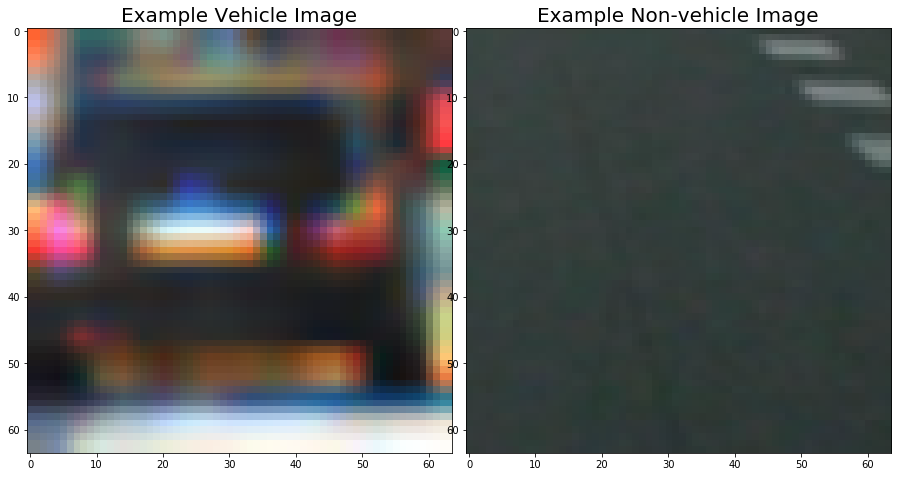

In [8]:
# Return a random index within range of the minimum length in both lists
idx_max = np.minimum(data_info_test["n_vehicles"], data_info_test["n_non_vehicles"])
idx_random = np.random.randint(0, idx_max)
print("Current random index is", idx_random)

# Read in vehicles / non-vehicles images
vehicle_image_test = mpimg.imread(vehicles_test[idx_random])
non_vehicle_image_test = mpimg.imread(non_vehicles_test[idx_random])

# Plot the examples
f, axs = plt.subplots(1, 2, figsize=(30, 15))
axs = axs.ravel()

axs[0].imshow(vehicle_image_test)
axs[0].set_title('Example Vehicle Image', fontsize = 20)

axs[1].imshow(non_vehicle_image_test)
axs[1].set_title('Example Non-vehicle Image', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0., right=0.4, top=0.9, bottom=0.)

__Apply HOG with different parameters__

__Import functions__

In [9]:
from helper_functions import get_hog_features

__Define parameters__

In [10]:
# Define HOG parameters
# First set
orient = 9
pix_per_cell = 8
cell_per_block = 2
vis = True
feature_vec = False

# Second set
orient_2 = 9
pix_per_cell_2 = 4
cell_per_block_2 = 2
vis_2 = True
feature_vec_2 = False

# Third set
orient_3 = 9
pix_per_cell_3 = 16
cell_per_block_3 = 2
vis_3 = True
feature_vec_3 = False

__Covert to grayscale__

In [11]:
# Convert to grayscale
gray_vehicle_test = cv2.cvtColor(vehicle_image_test, cv2.COLOR_RGB2GRAY)
gray_non_vehicle_test = cv2.cvtColor(non_vehicle_image_test, cv2.COLOR_RGB2GRAY)

__Return HOG features and visualization__

In [12]:
# Return HOG features and visualization
# First set
features_vehicle, hog_image_vehicle = get_hog_features(gray_vehicle_test, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

features_non_vehicle, hog_image_non_vehicle = get_hog_features(gray_non_vehicle_test, orient,
                                                      pix_per_cell, cell_per_block,
                                                      vis, feature_vec)

# Second set
features_vehicle_2, hog_image_vehicle_2 = get_hog_features(gray_vehicle_test, orient_2,
                                                      pix_per_cell_2, cell_per_block_2,
                                                      vis_2, feature_vec_2)

features_non_vehicle_2, hog_image_non_vehicle_2 = get_hog_features(gray_non_vehicle_test, orient_2,
                                                      pix_per_cell_2, cell_per_block_2,
                                                      vis_2, feature_vec_2)

# Third set
features_vehicle_3, hog_image_vehicle_3 = get_hog_features(gray_vehicle_test, orient_3,
                                                      pix_per_cell_3, cell_per_block_3,
                                                      vis_3, feature_vec_3)

features_non_vehicle_3, hog_image_non_vehicle_3 = get_hog_features(gray_non_vehicle_test, orient_3,
                                                      pix_per_cell_3, cell_per_block_3,
                                                      vis_3, feature_vec_3)

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


__Plot images__

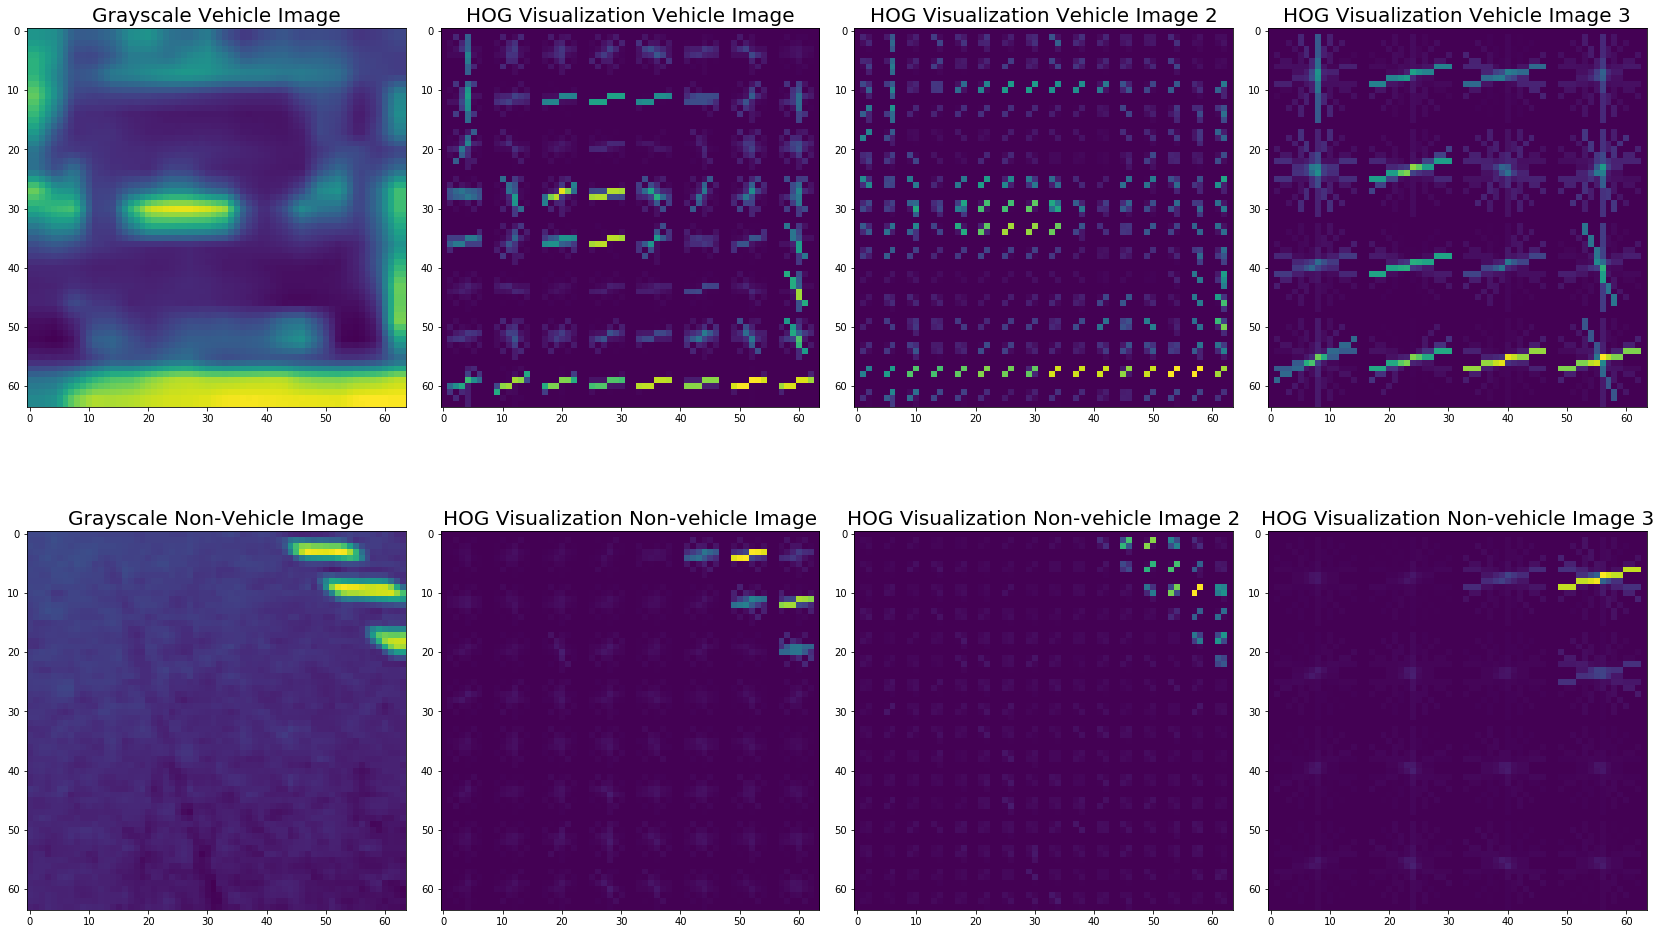

In [13]:
# Plot the examples
f, axs = plt.subplots(2, 4, figsize=(30, 30))
axs = axs.ravel()

axs[0].imshow(gray_vehicle_test)
axs[0].set_title('Grayscale Vehicle Image', fontsize = 20)

axs[1].imshow(hog_image_vehicle)
axs[1].set_title('HOG Visualization Vehicle Image', fontsize = 20)

axs[2].imshow(hog_image_vehicle_2)
axs[2].set_title('HOG Visualization Vehicle Image 2', fontsize = 20)

axs[3].imshow(hog_image_vehicle_3)
axs[3].set_title('HOG Visualization Vehicle Image 3', fontsize = 20)

axs[4].imshow(gray_non_vehicle_test)
axs[4].set_title('Grayscale Non-Vehicle Image', fontsize = 20)

axs[5].imshow(hog_image_non_vehicle)
axs[5].set_title('HOG Visualization Non-vehicle Image', fontsize = 20)

axs[6].imshow(hog_image_non_vehicle_2)
axs[6].set_title('HOG Visualization Non-vehicle Image 2', fontsize = 20)

axs[7].imshow(hog_image_non_vehicle_3)
axs[7].set_title('HOG Visualization Non-vehicle Image 3', fontsize = 20)

f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

__Apply spatial binning and color histogram in different color spaces__  

Then I tried spatial binning and color histogram in different color spaces


| Parameters name  | First set | Second set | Third set | Fourth set |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Color spaces  | 'RGb'  | 'RGB' | 'HLS' | 'YCrCb' |
| Spatial size  | (32, 32)  | (32, 32) | (32, 32) | (32, 32) |
| Histogram bins  | 32  | 32 | 32 | 32 |
| Histogram range  | (0, 256)  | (0, 256) | (0, 256) | (0, 256) |

__Import libraries__

In [14]:
# from sklearn.preprocessing import StandardScaler
# from mpl_toolkits.mplot3d import Axes3D

__Import functions__

In [15]:
# from helper_functions import extract_features_bin_spatial_hist, plot3d

__Define parameters__

In [16]:
# # RGB
# color_space = 'RGB'
# spatial_size=(32, 32)
# hist_bins=32
# hist_range=(0, 256)

# # HSV
# color_space_2 = 'RGB'
# spatial_size_2 = (32, 32)
# hist_bins_2 = 32
# hist_range_2 = (0, 256)

# # HLS
# color_space_3 = 'HLS'
# spatial_size_3 = (32, 32)
# hist_bins_3 = 32
# hist_range_3 = (0, 256)

# # YCrCb
# color_space_4 = 'YCrCb'
# spatial_size_4 = (32, 32)
# hist_bins_4 = 32
# hist_range_4 = (0, 256)

__Return spatial binning of color features__

In [17]:
# # RGB
# features_bin_spatial_hist_vehicle = extract_features_bin_spatial_hist(vehicles_test, color_space, spatial_size,
#                         hist_bins, hist_range)

# features_bin_spatial_hist_non_vehicle = extract_features_bin_spatial_hist(non_vehicles_test, color_space, spatial_size,
#                         hist_bins, hist_range)

# # HSV
# features_bin_spatial_hist_vehicle_2 = extract_features_bin_spatial_hist(vehicles_test, color_space_2, spatial_size_2,
#                         hist_bins_2, hist_range_2)

# features_bin_spatial_hist_non_vehicle_2 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_2, spatial_size_2,
#                         hist_bins_2, hist_range_2)

# # HLS
# features_bin_spatial_hist_vehicle_3 = extract_features_bin_spatial_hist(vehicles_test, color_space_3, spatial_size_3,
#                         hist_bins_3, hist_range_3)

# features_bin_spatial_hist_non_vehicle_3 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_3, spatial_size_3,
#                         hist_bins_3, hist_range_3)

# # YCrCb
# features_bin_spatial_hist_vehicle_4 = extract_features_bin_spatial_hist(vehicles_test, color_space_4, spatial_size_4,
#                         hist_bins_4, hist_range_4)

# features_bin_spatial_hist_non_vehicle_4 = extract_features_bin_spatial_hist(non_vehicles_test, color_space_4, spatial_size_4,
#                         hist_bins_4, hist_range_4)

__Normalize feature vectors__

In [18]:
# # RGB
# if len(features_bin_spatial_hist_vehicle) > 0:
#     # Create an array stack of feature vectors
#     X = np.vstack((features_bin_spatial_hist_vehicle, features_bin_spatial_hist_non_vehicle)).astype(np.float64)
#     # Fit a per-column scaler
#     X_scaler = StandardScaler().fit(X)
#     # Apply the scaler to X
#     scaled_X = X_scaler.transform(X)
# else: 
#     print('Your function only returns empty feature vectors for RGB')
    
# # HSV
# if len(features_bin_spatial_hist_vehicle_2) > 0:
#     # Create an array stack of feature vectors
#     X_2 = np.vstack((features_bin_spatial_hist_vehicle_2, features_bin_spatial_hist_non_vehicle_2)).astype(np.float64)
#     # Fit a per-column scaler
#     X_scaler_2 = StandardScaler().fit(X_2)
#     # Apply the scaler to X
#     scaled_X_2 = X_scaler_2.transform(X_2)
# else: 
#     print('Your function only returns empty feature vectors for HSV')
    
# # HLS
# if len(features_bin_spatial_hist_vehicle_3) > 0:
#     # Create an array stack of feature vectors
#     X_3 = np.vstack((features_bin_spatial_hist_vehicle_3, features_bin_spatial_hist_non_vehicle_3)).astype(np.float64)
#     # Fit a per-column scaler
#     X_scaler_3 = StandardScaler().fit(X_3)
#     # Apply the scaler to X
#     scaled_X_3 = X_scaler_3.transform(X_3)
# else: 
#     print('Your function only returns empty feature vectors for HLS')
    
# # YCrCb
# if len(features_bin_spatial_hist_vehicle_4) > 0:
#     # Create an array stack of feature vectors
#     X_4 = np.vstack((features_bin_spatial_hist_vehicle_4, features_bin_spatial_hist_non_vehicle_4)).astype(np.float64)
#     # Fit a per-column scaler
#     X_scaler_4 = StandardScaler().fit(X_4)
#     # Apply the scaler to X
#     scaled_X_4 = X_scaler_4.transform(X_4)
# else: 
#     print('Your function only returns empty feature vectors for YCrCb')

__Plot images__

In [19]:
# # Plot image

# fig = plt.figure(figsize=(12,4))

# # RGB
# plt.subplot(241)
# plt.plot(X[idx_random])
# plt.title('Raw Features(RGB)')
# plt.subplot(245)
# plt.plot(scaled_X[idx_random])
# plt.title('Normalized Features(RGB)')

# # HSV
# plt.subplot(242)
# plt.plot(X_2[idx_random])
# plt.title('Raw Features(HSV)')
# plt.subplot(246)
# plt.plot(scaled_X_2[idx_random])
# plt.title('Normalized Features(HSV)')

# # HLS
# plt.subplot(243)
# plt.plot(X_3[idx_random])
# plt.title('Raw Features(HLS)')
# plt.subplot(247)
# plt.plot(scaled_X_3[idx_random])
# plt.title('Normalized Features(HLS)')

# # YCrCb
# plt.subplot(244)
# plt.plot(X_4[idx_random])
# plt.title('Raw Features(YCrCb)')
# plt.subplot(248)
# plt.plot(scaled_X_4[idx_random])
# plt.title('Normalized Features(YCrCb)')

# fig.tight_layout()


__Plot image in 3D__

In [20]:
# # Read a color image
# img = cv2.imread(vehicles_test[idx_random])
# #img = cv2.imread("000275.png")
# #img = mpimg.imread(vehicles[idx_random])

# # Select a small fraction of pixels to plot by subsampling it
# scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
# img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# # Convert subsampled image to desired color space(s)
# # RGB
# img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
# img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting
# # HSV
# img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
# # HLS
# img_small_HLS = cv2.cvtColor(img_small, cv2.COLOR_BGR2HLS)
# # YCrCb
# img_small_YCrCb = cv2.cvtColor(img_small, cv2.COLOR_BGR2YCrCb)


# # Plot and show
# plot3d(img_small_RGB, img_small_rgb)
# plt.show()

# plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
# plt.show()

# plot3d(img_small_HLS, img_small_rgb, axis_labels=list("HLS"))
# plt.show()

# plot3d(img_small_YCrCb, img_small_rgb, axis_labels=list("YCrCb"))
# plt.show()

#### 2. Explain how you settled on your final choice of HOG parameters.

I tried various combinations of parameters and came up th following decision with explanation.
The documentation for `hog()` function can be found [here](http://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=feature%20hog#skimage.feature.hog).

* For orientations, either 11 or 17 would be acceptable. I go with `orientation = 11`.
* For pixels_per_cell, smaller number will return more cells. For a 64 by 64 pixels picture, `pix per cell = 8` is good enough.
* For cells per block, either 2 or 4 would be good. I go with `cell_per_block = 2`.
* For visualize, I don't need the image return back in the following cells. Set `False` to it.
* For feature_vector, I need it to be a 1 demensional array for concatenating to other features. Therefore, set `True` to it.
* For multichannel, I am using `YUV` color space with `ALL` channels
___
__Final list__  
orient_final = 11  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False  
feature_vec_final = True  
color_space = 'YUV'  
multichannel_final = 'ALL'  


#### 3. Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

I trained a linear SVM using the following features:
  
+ __HOG features__  
orient_final = 11  
pix_per_cell_final = 8  
cell_per_block_final = 2  
vis_final = False  
feature_vec_final = True  
color_space = 'YUV'  
multichannel_final = 'ALL'  
___
Here are the training steps:
+ Extract the specific features from the dataset
+ Normalie the extracted features vector
+ Define labels vector
+ Split up and randomize on both extracted features vector and labels vector
    - Return training dataset and test dataset
+ Create SVM
+ Fit the training dataset into SVM
+ Evaluate the accuracy of SVM
+ Predict the result with the test dataset
+ Done

__Import libraries__

In [21]:
import time
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import sklearn.model_selection as grid_search
from sklearn.cross_validation import train_test_split
# But, if you are using scikit-learn >= 0.18 then use this:
# from sklearn.model_selection import train_test_split

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


__Import functions__

In [22]:
from helper_functions import extract_hog_features

__Define parameters__

In [23]:
# Define extraction parameters
color_space_final = 'YUV'   # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
spatial_size_final = (16, 16)  
hist_bins_final = 16  
hist_range_final = (0, 256)  

orient_final = 11
pix_per_cell_final = 16
cell_per_block_final = 2  
vis_final = False # Hardcoded in the function extract_features_single_image()
feature_vec_final = True # Hardcoded in the function extract_features_single_image()
multichannel_final = "ALL"   # Can be 0, 1, 2, or "ALL"
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off

__Extract the specific features from the dataset__

In [24]:
t1=time.time()

# Create a list to append feature vectors to
vehicle_features_all = []
non_vehicle_features_all = []

# Extract features from each images    
# for vehicle_image in augmented_vehicle_images:

# Extract features from image
vehicle_features_all = extract_hog_features(augmented_vehicle_images, cspace=color_space_final, orient=orient_final, 
                                             pix_per_cell=pix_per_cell_final, cell_per_block=cell_per_block_final, 
                                             hog_channel=multichannel_final)
    


t2 = time.time()
print(round(t2-t1, 2), 'Seconds to extract features from vehicle images.')


# Extract features from each images
# for non_vehicle_image in augmented_non_vehicle_images:

# Extract features from image
non_vehicle_features_all = extract_hog_features(augmented_non_vehicle_images, cspace=color_space_final, orient=orient_final, 
                                             pix_per_cell=pix_per_cell_final, cell_per_block=cell_per_block_final, 
                                             hog_channel=multichannel_final)

t3 = time.time()
print(round(t3-t2, 2), 'Seconds to extract features from non-vehicle images.')

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


39.33 Seconds to extract features from vehicle images.
39.83 Seconds to extract features from non-vehicle images.


In [25]:
print(len(vehicle_features_all))
print(len(non_vehicle_features_all))

17584
17936


__Normalie the extracted features vector__

In [26]:
# # Normalize
# if len(vehicle_features_all) > 0:
#     # Create an array stack of feature vectors
#     X_final = np.vstack((vehicle_features_all, non_vehicle_features_all)).astype(np.float64)                        
#     # Fit a per-column scaler
#     X_scaler_final = StandardScaler().fit(X_final)
#     # Apply the scaler to X
#     scaled_X_final = X_scaler_final.transform(X_final)
# else: 
#     print('Your function only returns empty feature vectors for RGB')

In [27]:
# Create an array stack of feature vectors
X_scaler_final = np.vstack((vehicle_features_all, non_vehicle_features_all)).astype(np.float64)

# Fit a per-column scaler - this will be necessary if combining different types of features (HOG + color_hist/bin_spatial)
#X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
#scaled_X = X_scaler.transform(X)

__Define labels vector__

In [28]:
# Define the labels vector
y_final = np.hstack((np.ones(len(vehicle_features_all)), 
               np.zeros(len(non_vehicle_features_all))))

__Split up and randomize on both extracted features vector and labels vector__

In [29]:
# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaler_final, y_final, test_size=0.2, random_state=rand_state)

print('Using spatial binning of:',spatial_size_final,
    'and', hist_bins_final,'histogram bins')
print('Feature vector length:', len(X_train[0]))

Using spatial binning of: (16, 16) and 16 histogram bins
Feature vector length: 1188


__Create SVM__

In [30]:
# # Apply GridSearchCV to SVM
# parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 1]}
# # parameters = {'kernel':['linear'], 'C':[0.01, 1]}
# # parameters = {'kernel':['linear'], 'C':[0.01]}
# svr = svm.SVC()

In [31]:
# Use a linear SVC 
svc = svm.LinearSVC()

In [32]:
# # Check the training time for the SVC
# t=time.time()
# # svc.fit(X_train, y_train)

# # Train the classifier
# clf = grid_search.GridSearchCV(svr, parameters)
# clf.fit(X_train, y_train)

# t2 = time.time()
# print(round(t2-t, 2), 'Seconds to train SVC...')

In [33]:
# # Return best fitted classifier

# # The fit function now tries all the parameter combinations, 
# # and returns a fitted classifier that's automatically tuned to the optimal parameter combination. 
# # You can now access the parameter values via clf.best_params_
# print('Optimal parameter combination is ', clf.best_params_)

In [34]:
# svc = clf

__Fit the training dataset into SVM__

In [35]:
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')

7.48 Seconds to train SVC...


__Evaluate the accuracy of SVM__

In [36]:
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))

Test Accuracy of SVC =  0.9818


__Predict the result with the test dataset__

In [37]:
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', svc.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

My SVC predicts:  [ 1.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
For these 10 labels:  [ 1.  0.  1.  0.  0.  0.  0.  0.  1.  1.]
0.00503 Seconds to predict 10 labels with SVC


__Run the following code once a new classifier is created__

__Save a dictonary for future use__

In [38]:
# Create dictionary
dict_vehicle_detection = {"svc": svc, 
                          "X_scaler": X_scaler_final, 
                          "orient": orient_final, 
                          "pix_per_cell": pix_per_cell_final, 
                          "cell_per_block": cell_per_block_final, 
                          "feature_vec": feature_vec_final, 
                          "spatial_size": spatial_size_final, 
                          "hog_channel": multichannel_final, 
                          "hist_bins": hist_bins_final, 
                          "hist_range": hist_range_final, 
                          "spatial_feat": spatial_feat, 
                          "hist_feat": hist_feat, 
                          "hog_feat": hog_feat,
                         }

# Save dictionary
pickle.dump(dict_vehicle_detection, open('dict_vehicle_detection.p', 'wb'))

### Sliding Window Search

#### 1. Describe how (and identify where in your code) you implemented a sliding window search.  How did you decide what scales to search and how much to overlap windows?

I decided to search window in multiple different scales and set the `cells_per_step = 2`  based on the experiment below. The code below is used to evaluate the performance of different combination of window scale and overlap value.  
From the final result, I come up the following conclusions:
* Larger overlap will result in more match windows
* Less overlap will result in less match window, nevertheless, not good for the following steps "add heat" and "filter".
* Smaller window will give you more match windows to analyze
* Bigger window will result less overlap, not good for the following steps "add heat" and "filter".

I explored sliding window search on the same image with different parameteres.


| Parameters name | First set | Second set | Third set | Fourth set | Fifth set |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Window size | (64, 64) | (64, 64) | (64, 64) | (32, 32) | (96, 96) |
| Window overlap | (0.5, 0.5)  | (0.2, 0.2) | (0.8, 0.8) | (0.5, 0.5) | (0.5, 0.5) |


__Import functions__

In [39]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import glob

% matplotlib inline

In [40]:
from helper_functions import search_windows, find_cars, draw_boxes, apply_threshold, draw_labeled_bboxes

__Read in test images__

In [41]:
test_img = mpimg.imread('./test_images/test1.jpg')
draw_image = np.copy(test_img)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

__Define parameters__

In [42]:
colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11
pix_per_cell = 16
cell_per_block = 2
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
ystart = 350
ystop = 660
scale = 1.5

__Load trained classifier__

In [43]:
# Load dictionary
dict_pickle = pickle.load(open('dict_vehicle_detection.p', 'rb'))
# Read data
svc = dict_pickle["svc"]

__Search windows with single scale__

In [44]:
# Return the windows founded from the given image with single scale
draw_image, windows = find_cars(test_img, ystart, ystop, scale, colorspace, hog_channel, svc, None, orient, pix_per_cell, cell_per_block, None, None, show_all_windows = False)

print(len(windows), 'windows found in image')

# Draw boxes
test_img_windows = draw_boxes(test_img, windows)

3 windows found in image


C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


__Plot images__

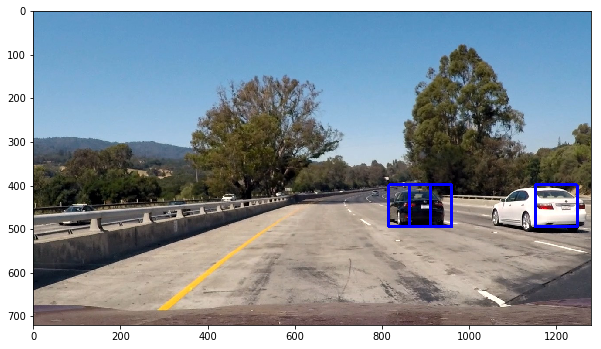

In [45]:
plt.figure(figsize=(10,10))
plt.imshow(test_img_windows)

__Search windows with multiple scales__

In [46]:
# Return the windows founded from the given image with multiple scales
list_windows = search_windows(test_img, ystart, ystop, colorspace, hog_channel, svc, None, orient, pix_per_cell, cell_per_block, None, None, False)

# Learned from stackflow (https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python)
windows_flatten = [item for sublist in list_windows for item in sublist] 

# Draw boxes
test_img_windows = draw_boxes(test_img, windows_flatten, color='random', thick=2)

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


__Plot images__

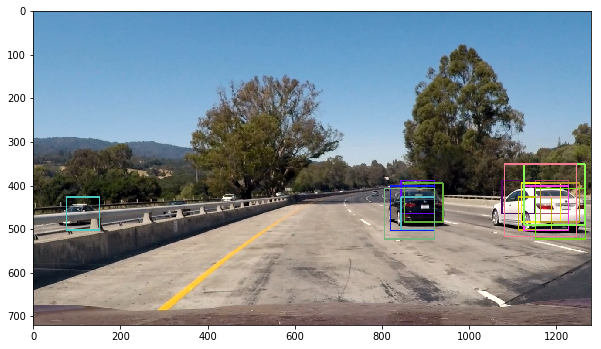

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(test_img_windows)

### Heatmap
This method (duplicated from lesson material) produces a heat map based on rectangle locations (additive with overlap).

__Import libraries__

In [48]:
from scipy.ndimage.measurements import label

__Import functions__

In [49]:
from helper_functions import add_heat

__Read in test images__

In [50]:
# Images are in JPEG format
test_images = glob.glob('./test_images/test1.jpg')

# Creat a list to store the file paths
test_images_all = []
for image in test_images:
    test_images_all.append(image)

__Process test images__

In [51]:
# Initialize an empty list
list_original_img = []
list_heatmap_original = []
list_heatmap_filtered = []
list_labeled_car = []
list_draw_img = []

# Read image
image = mpimg.imread(test_images[0])
heat_original = np.zeros_like(image[:,:,0]).astype(np.float)

# Add heat to each box in box list
heat = add_heat(heat_original,windows_flatten)

# Apply threshold to help remove false positives
heat_filtered = apply_threshold(np.copy(heat), 1)

# Visualize the heatmap when displaying    
heatmap = np.clip(heat_filtered, 0, 255)

# Find final boxes from heatmap using label function
labels = label(heatmap)

# Draw bounding boxes on a copy of the image
draw_img = draw_labeled_bboxes(np.copy(image), labels)[0]

# Append the original image to the list 
list_original_img.append(image)

# Append the original output heatmap to the list 
list_heatmap_original.append(heat_original)

# Append the filtered output heatmap to the list 
list_heatmap_filtered.append(heat_filtered)

# Append the output labels to the list 
list_labeled_car.append(labels)

# Append the output image to the list 
list_draw_img.append(draw_img)

__Plot images__

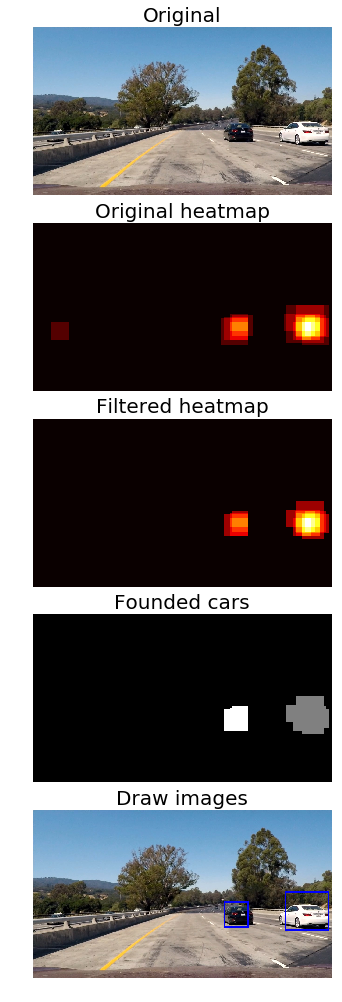

In [52]:
# Plot the draw images
f, axs = plt.subplots(5, 1, figsize=(36, 24))
# axs = axs.ravel()

# Plot image
axs[0].imshow(list_original_img[0])
# Set title name
title_name = 'Original'
axs[0].set_title(title_name, fontsize = 20)
axs[0].axis('off')

# Plot image
axs[1].imshow(list_heatmap_original[0], cmap='hot')
# Set title name
title_name = 'Original heatmap'
axs[1].set_title(title_name, fontsize = 20)
axs[1].axis('off')

# Plot image
axs[2].imshow(list_heatmap_filtered[0], cmap='hot')
# Set title name
title_name = 'Filtered heatmap'
axs[2].set_title(title_name, fontsize = 20)
axs[2].axis('off')

# Plot image
axs[3].imshow(list_labeled_car[0][0], cmap='gray')
# Set title name
title_name = 'Founded cars'
axs[3].set_title(title_name, fontsize = 20)
axs[3].axis('off')

# Plot image
axs[4].imshow(list_draw_img[0])
# Set title name
title_name = 'Draw images'
axs[4].set_title(title_name, fontsize = 20)
axs[4].axis('off')
    
f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

#### 2. Show some examples of test images to demonstrate how your pipeline is working.  What did you do to optimize the performance of your classifier?

Ultimately I searched on multiple scales using HLS 3-channel HOG features plus spatially binned color and histograms of color in the feature vector, which provided a nice result. Those features extraction, classifying and window drawing were implemented in the function `find_cars()`. To enhance the efficiency of classifying, there are few code in `find_cars()` to extract HOG features just once for the entire region of interest in each full image / video frame. Please refer to the below images for your reference.

__Import libraries__

In [53]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import random

% matplotlib inline

__Import functions__

In [54]:
from helper_functions import process_test_image

__Read in test images__

In [55]:
# Images are in JPEG format
test_images = glob.glob('./test_images/*.jpg')

# Creat a list to store the file paths
test_images_all = []
for image in test_images:
    test_images_all.append(image)

__Plot founded cars on test images__

C:\Users\ikc\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


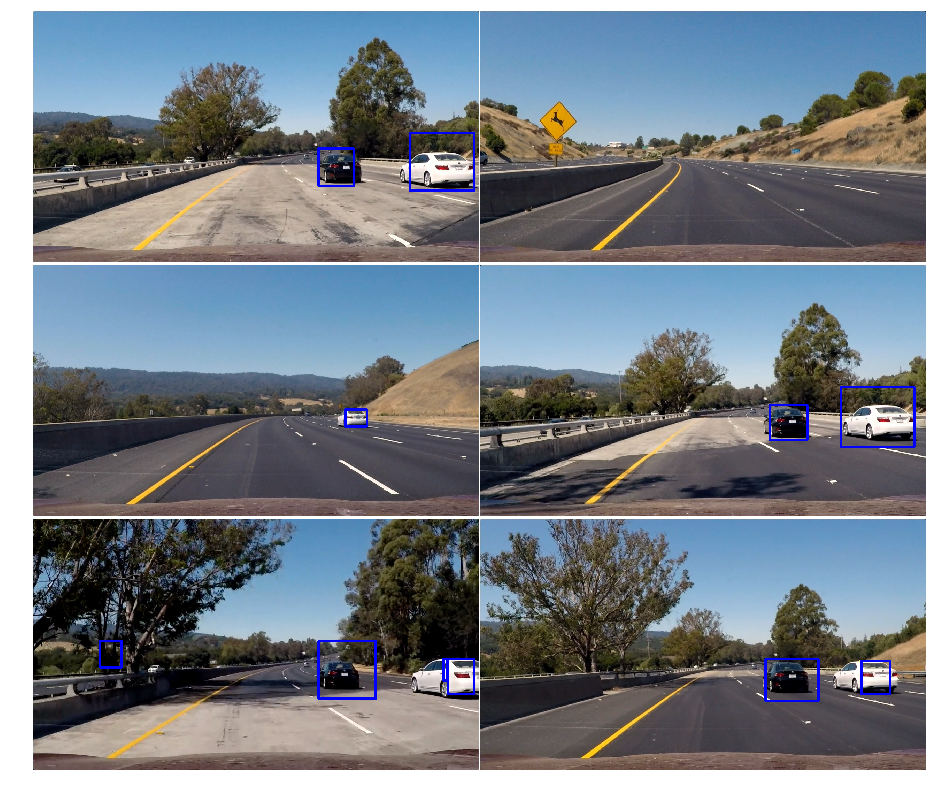

In [56]:
fig, axs = plt.subplots(3, 2, figsize=(16,14))
fig.subplots_adjust(hspace = .004, wspace=.002)
axs = axs.ravel()

for i, im in enumerate(test_images):
    axs[i].imshow(process_test_image(mpimg.imread(im)))
    axs[i].axis('off')

### Video Implementation

#### 1. Provide a link to your final video output.  Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)
Here's a [link to my video result](./test_videos_output/project_video_output.mp4)

__Import Libraries__

In [57]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [58]:
from helper_functions import process_image

__Process Video__  
Test on the given video project_video.mp4

In [59]:
video_output = 'test_videos_output/project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
# clip1 = VideoFileClip("project_video.mp4").subclip(4,10)
# clip1 = VideoFileClip("project_video.mp4").subclip(4,15)
# clip1 = VideoFileClip("project_video.mp4").subclip(23,30)
# clip1 = VideoFileClip("project_video.mp4").subclip(23,38)
# clip1 = VideoFileClip("project_video.mp4").subclip(4,20)
clip1 = VideoFileClip("project_video.mp4")
video_output_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!

%time video_output_clip.write_videofile(video_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/project_video_output.mp4
[MoviePy] Writing video test_videos_output/project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [32:49<00:01,  1.74s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/project_video_output.mp4 

Wall time: 32min 50s


__Play Video Inline__

In [60]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))

#### 2. Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

I recorded the multiple scales position of positive detection in each frame of the video.  From the positive detections I created a heatmap and then thresholded that map to identify vehicle positions.  I then used `scipy.ndimage.measurements.label()` to identify individual blobs in the heatmap.  I then assumed each blob corresponded to a vehicle.  I constructed bounding boxes to cover the area of each blob detected.  

Below are six drawn test images, their corresponding threshold images and the final heatmap.

__Import librarires__

In [61]:
from collections import deque

__Import functions__

In [62]:
def process_image_demo(img):
    # Load dictionary
    dict_pickle = pickle.load(open('dict_vehicle_detection.p', 'rb'))
    # Read data
    svc = dict_pickle["svc"]

    # Define parameters
    colorspace = 'YUV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 11
    pix_per_cell = 16
    cell_per_block = 2
    hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
    ystart = 350
    ystop = 660

    # Search windows
    list_windows = search_windows(img, ystart, ystop, colorspace, hog_channel, svc, None, orient, pix_per_cell, cell_per_block, None, None, False)

    # Learned from stackflow (https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python)
    windows_flatten = [item for sublist in list_windows for item in sublist] 

    # Create heatmap
    heat_original = np.zeros_like(img[:,:,0]).astype(np.float)
    
    # Add heat to each box in box list
    heat = add_heat(heat_original,windows_flatten)

    # Add new heat map to the list
    heatmaps_demo.append(np.copy(heat))

    # Define threshold value
    threshold_filter_demo = 10

    # Apply threshold to help remove false positives
    combined = sum(heatmaps_demo)
    heat_filtered = apply_threshold(combined, threshold_filter_demo)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heat_filtered, 0, 255)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)

    # Draw bounding boxes on a copy of the image
    draw_img = draw_labeled_bboxes(np.copy(img), labels)[0]
    return heat_original, heat_filtered, labels[0], draw_img

__Read images__

In [63]:
# Images are in png format
test_series_images = glob.glob('./output_images/test_1/*.png')

# Creat a list to store the file paths
test_series_images_all = []
for image in test_series_images:
    test_series_images_all.append(image)

__Run functions__

In [64]:
n_frames_demo = 4
heatmaps_demo = deque(maxlen = n_frames_demo)

In [65]:
# Initialize an empty list
list_test_series_images = []
list_heatmap_original = []
list_heatmap_filtered = []
list_labeled_car = []
list_draw_img = []

for idx in range(len(test_series_images_all)):
    # Read image
    image = mpimg.imread(test_series_images_all[idx])

    # Run function
    heat_original, heat_filtered, labeled_car, draw_img = process_image_demo(np.copy(image))
    
    # Append the original image to the list
    list_test_series_images.append(image)
    
    # Append the original heatmap to the list 
    list_heatmap_original.append(heat_original)
    
    # Append the filtered heatmap to the list 
    list_heatmap_filtered.append(heat_filtered)
    
    # Append the labeled car to the list
    list_labeled_car.append(labeled_car)
    
    # Append the output image to the list 
    list_draw_img.append(draw_img)

__Plot images__

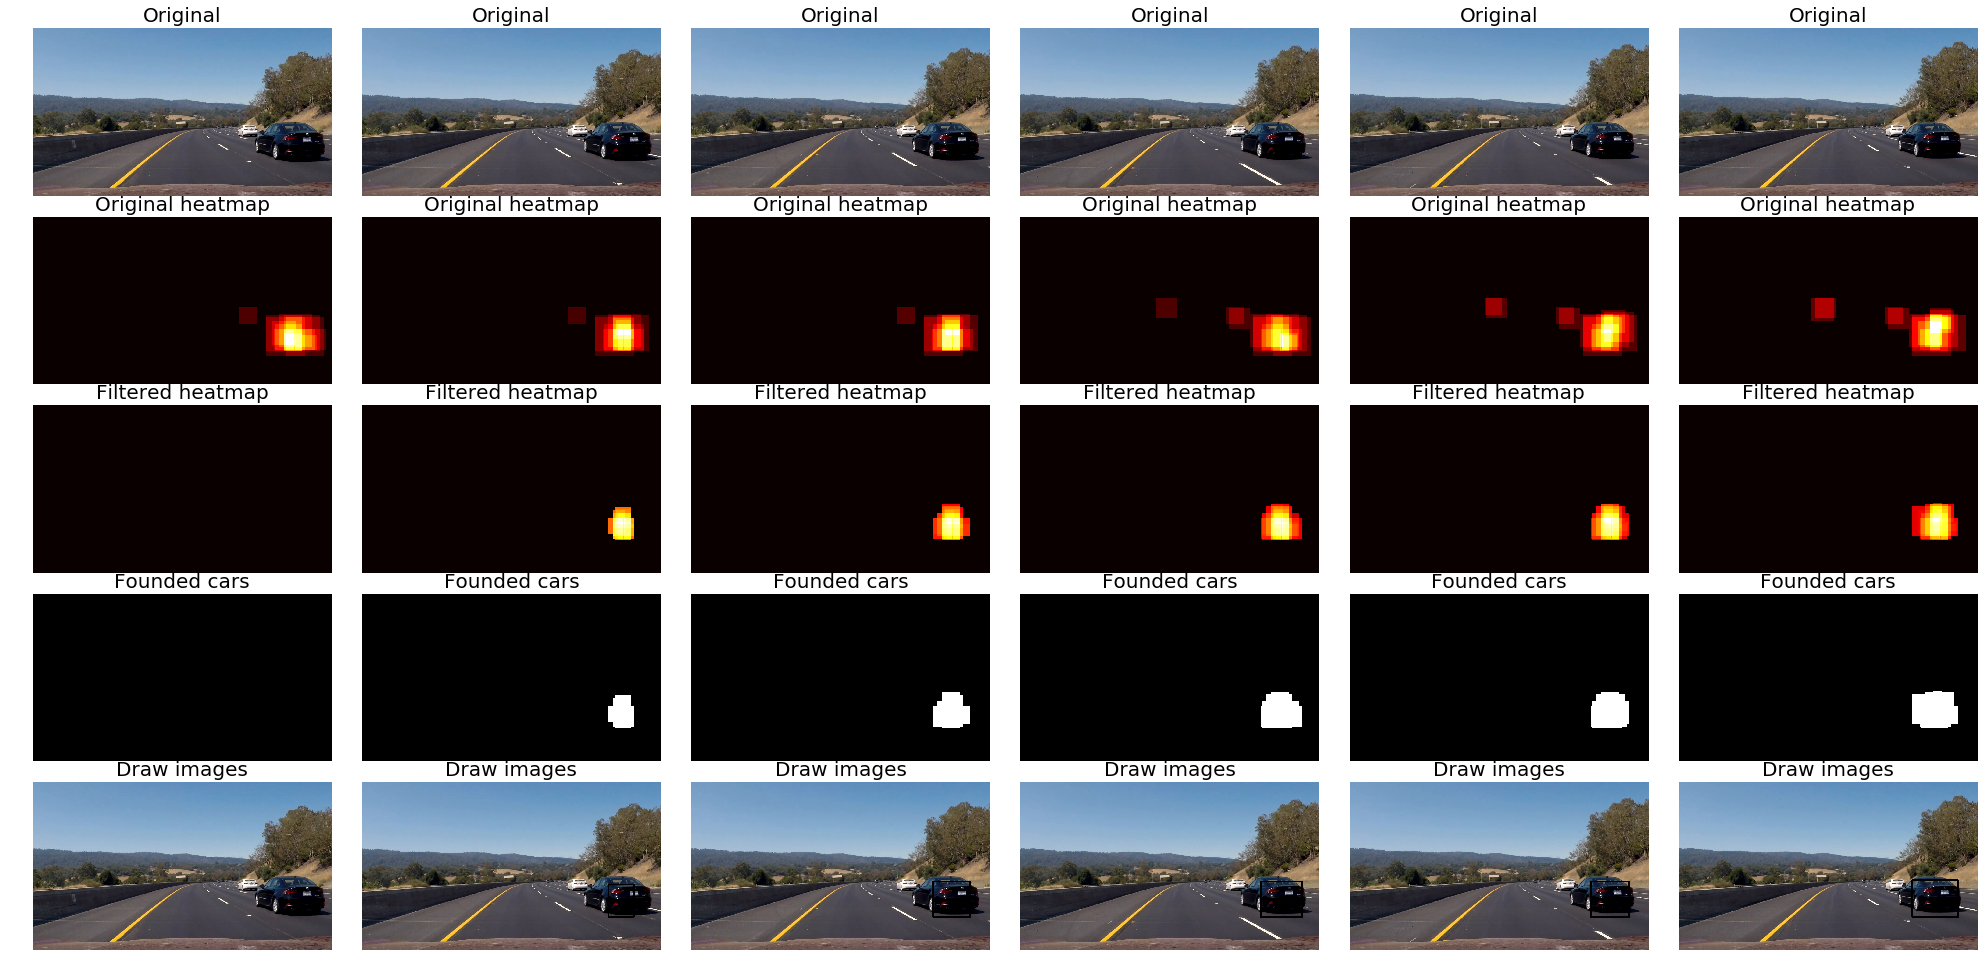

In [66]:
# Plot the draw images
col = len(test_series_images_all)
f, axs = plt.subplots(5, col, figsize=(36, 24))
axs = axs.ravel()

for idx in range(col):
    # Plot image
    axs[idx].imshow(list_test_series_images[idx])
    # Set title name
    title_name = 'Original'
    axs[idx].set_title(title_name, fontsize = 20)
    axs[idx].axis('off')

    # Plot image
    axs[idx+col].imshow(list_heatmap_original[idx], cmap='hot')
    # Set title name
    title_name = 'Original heatmap'
    axs[idx+col].set_title(title_name, fontsize = 20)
    axs[idx+col].axis('off')

    # Plot image
    axs[idx+col*2].imshow(list_heatmap_filtered[idx], cmap='hot')
    # Set title name
    title_name = 'Filtered heatmap'
    axs[idx+col*2].set_title(title_name, fontsize = 20)
    axs[idx+col*2].axis('off')

    # Plot image
    axs[idx+col*3].imshow(list_labeled_car[idx], cmap='gray')
    # Set title name
    title_name = 'Founded cars'
    axs[idx+col*3].set_title(title_name, fontsize = 20)
    axs[idx+col*3].axis('off')

    # Plot image
    axs[idx+col*4].imshow(list_draw_img[idx])
    # Set title name
    title_name = 'Draw images'
    axs[idx+col*4].set_title(title_name, fontsize = 20)
    axs[idx+col*4].axis('off')
    
f.tight_layout()
plt.subplots_adjust(left=0.1, right=0.85, top=0.85, bottom=0.3)

### Discussion

#### 1. Briefly discuss any problems / issues you faced in your implementation of this project.  Where will your pipeline likely fail?  What could you do to make it more robust?

Here are my steps to approach to the final pipeline.
+ Created my pipeline architecture with a small amout of test data
  - Extract the specific features from the dataset
  - Normalie the extracted features vector
  - Define labels vector
  - Split up and randomize on both extracted features vector and labels vector
      * Return training dataset and test dataset
  - Create SVM
  - Fit the training dataset into SVM
  - Evaluate the accuracy of SVM
  - Predict the result with the test dataset

+ Tried different combination of color spaces and HOG features.
+ Tried different heatmap threshold to filter out the false positive


Here are my problems/issues
1. Length of feature vector doesn't match the scaler
  - Fixed by controling the dimension of the feature vector
2. Too many or too less matched windows
  - Improved by using moderate window size and overlap
  - Improved by tunning the color spaces
  - Improved by tunning the HOG feature parameters
3. Drawing window in the shawdow of the tree.
  - Record the previous position and predict the next window appearance.
  - Calculate the width of window, discard the window if it is too wide.

Updated at 02/18/2018:
1. Discard color feature extraction, go with HOG feature only.
 - It looks like the previous implementation which including the color feature extraction was misleading the prediction.
 Need more investigation or comparison to figure out which part is making things worse.